# 1. IMPORTING REQUIRED LIBRARIES

In [1]:
# It is used for numerical operattions (e.g., arrays, with functions).
import numpy as np

# For working with tabular data (DataFrames, CSV files, etc.).
import pandas as pd

# For creating attractive and informative statistical graphics.
import seaborn as sns

# For basic plotting (line, bar, scatter, etc.)
import matplotlib.pyplot as plt

# To connect and interact with SQLite databases.
import sqlite3

# To perform independent t-tests between two groups.
from scipy.stats import ttest_ind

# Provides a wide range of statistical functions and distributions.
import scipy.stats as stats

# Suppressing all warnings for a cleaner output.
import warnings
warnings.filterwarnings('ignore')

# 2. LOADING THE DATASET

## (2.1) CREATING DATABASE CONNECTION

In [2]:
# Establish a connection to the SQLite database named 'inventory.db'

conn = sqlite3.connect('inventory.db')

## (2.2) FETCHING VENDOR SUMMARY DATA

In [3]:
# Run an SQL query to fetch all records from the 'vendor_sales_Summary' table
# and load the result intoa pandas DataFrame.
df = pd.read_sql_query("select * from vendor_sales_summary", conn)

# Display the first 5 rows of the DataFrame to get a quick look at the data.
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# 3. PERFORMING EXPLORATORY DATA ANALYSIS (EDA)
>- Previously, we explored the tables in the database to find key columns, understand how they are connected, and decide which ones to use in the final analysis. 
>- In this phase of EDA, we will study the final table to learn how much each column is spread out. This will help us find patterns, spot unusual values, and check data quality before doing deeper analysis. 

## (3.1) SUMMARY STATISTICS

In [4]:
# Get summary statistics for all numeric columns and transpose the result.
# This makes each row represent a column in the dataset, and each column shows a statistic.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


## (3.2) CREATING DISTRIBUTION PLOT (HISTOGRAM) FOR NUMERICAL COLUMNS

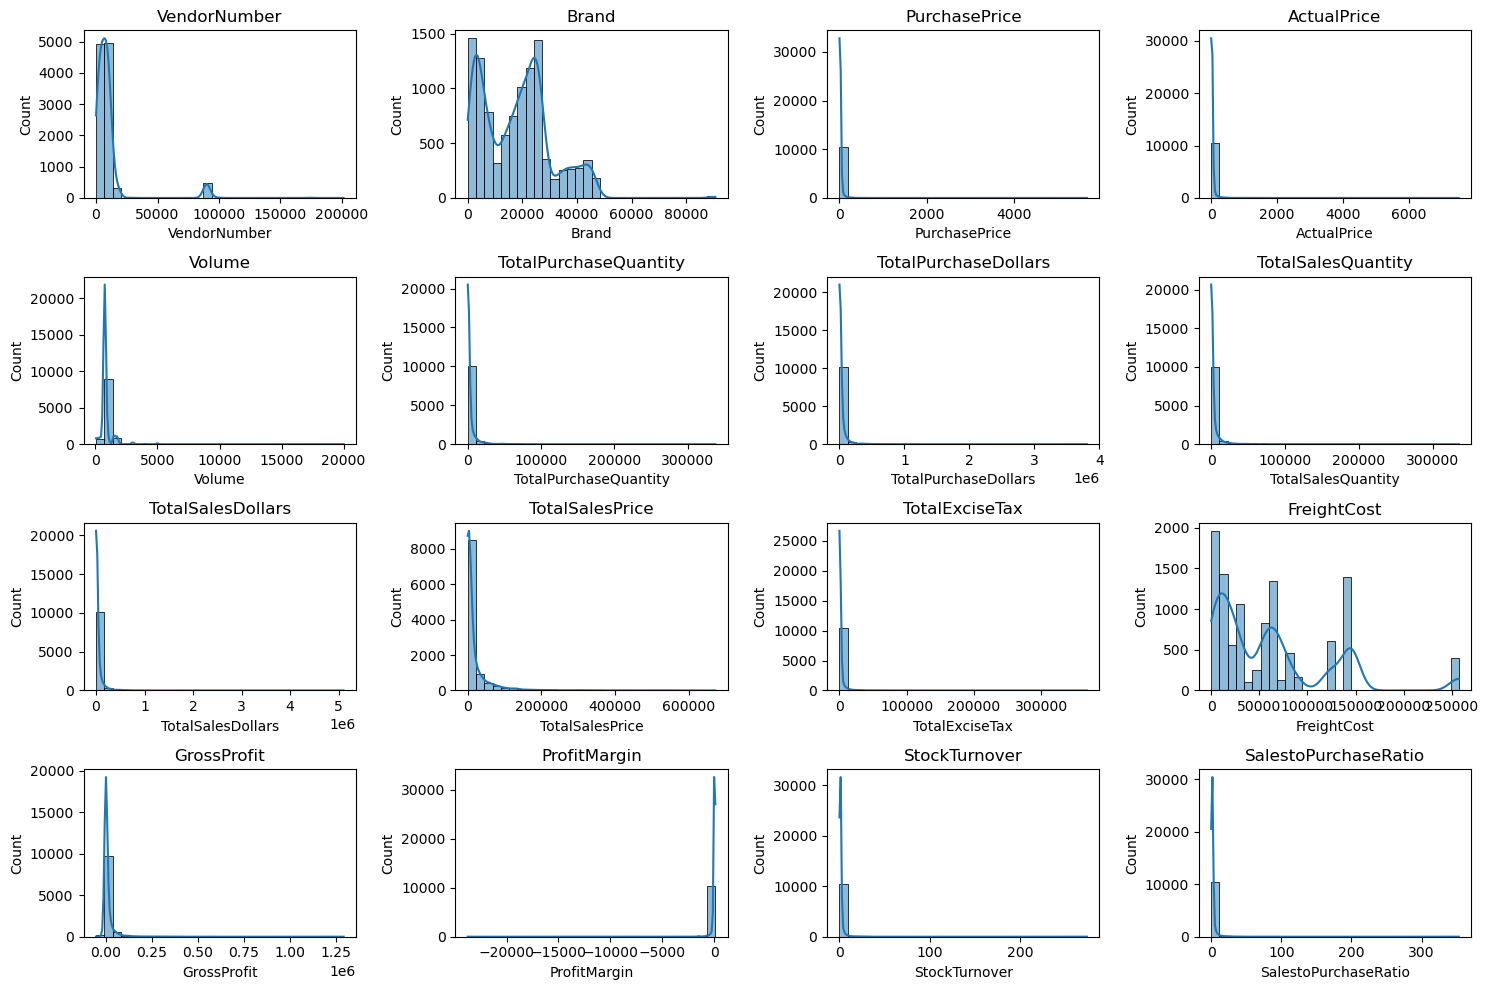

In [5]:
# Get all the column names in the DataFrame that contain numeric data.
numerical_cols = df.select_dtypes(include = np.number).columns

# Set the overall size of the plot (width = 15, height = 10)
plt.figure(figsize = (15, 10))

# Loop through each numeric column to plot its distribution.
for i, col in enumerate(numerical_cols):

    # Create a subplot grid (4 rows, 4 columns) and select the (i + 1)th subplot.
    plt.subplot(4, 4, i + 1)

    # Plot a histogram with a KDE (curve) for the current numeric column.
    sns.histplot(df[col], kde = True, bins = 30)

    # Set the title of each subplot to the column name.
    plt.title(col)

# Adjust layout to prevent overlap between plots.
plt.tight_layout()

# Display all the subplots.
plt.show()

## (3.3) OUTLIER DETECTION WITH BOXPLOTS

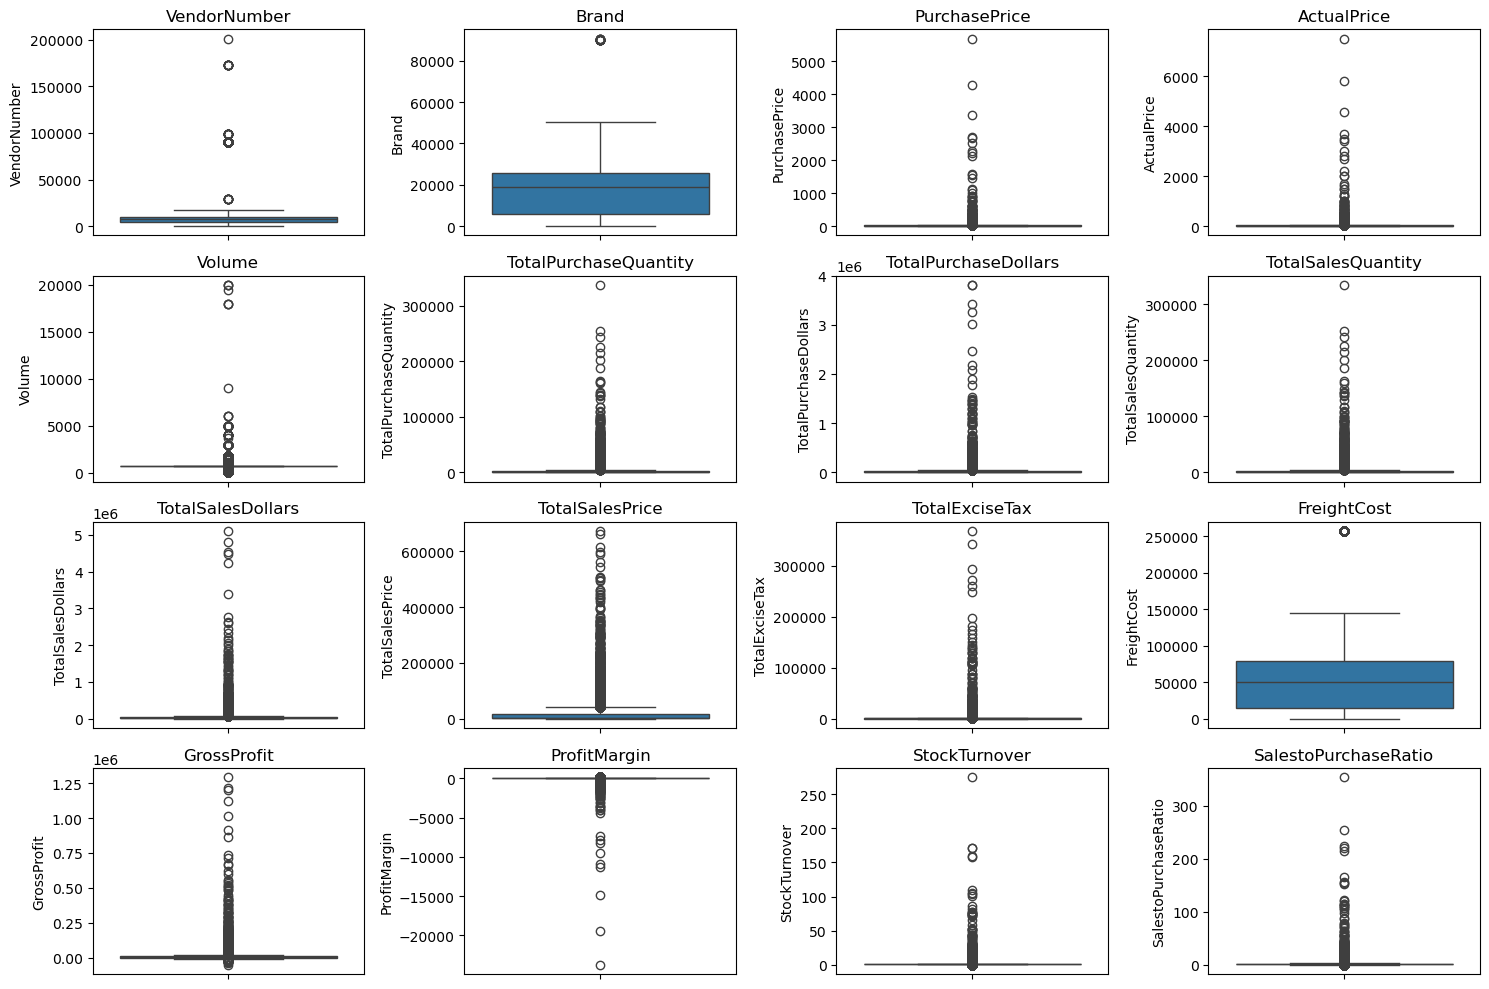

In [6]:
# Set the size of the entire figure (width = 15, height = 10).
plt.figure(figsize = (15, 10))

# Loop through each numeric column to create individual bxplots.
for i, col in enumerate(numerical_cols):

    # Create a subplot in a 4*4 grid, placing the plot at position (i + 1).
    plt.subplot(4, 4, i + 1)

    # Create a boxplot for the current column to check data spread and outliers.
    sns.boxplot(y = df[col])

    # Set the title of the plot as the column name.
    plt.title(col)

# Adjust spacing between subplots to avoid overlapping.
plt.tight_layout()

# Display the final combined figure with all boxlots.
plt.show()

### (3.3.1) SUMMARY STATISTICS INSIGHTS :
**Negative & Zero Values :**
>- **Gross Profit :** Minimum value is -52,002.78, which means there were losses. Some products may be sold for less than their cost or at heavy discounts.
>- **Profit Margin :** Has a minimum of -∞(infinity), meaning revenue is zero or less than the cost.
>- **Total Sales Quantity & Sales Dollars:** Minimum values are 0, meaning some products were purchased but never sold. These could be items that are slow to sell or no longer useful.

**Outliers Indicated by High Standard Deviations :**
>- **Purchase & Actual Prices :** The max values (5,681.81 & 7499.99) are much higher than the mean (24.39 & 35.64), meaning some items are premium(expensive) products.
>- **Freight Cost :** Big range, from 0.09 to 257,032.07, shows shippping problems or very large deliveries.
>- **Stock Tunrover :** Ranges from 0 to 274.5, meaning some products sell extremely fast while others remain in stock for a long time. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity because sales are being covered fromold stock.

## (3.4) FILTERING THE DATA BY REMOVING INCONSISTENCIES

### (3.4.1) FILTERING PROFITABLE AND ACTIVE SALES RECORDS

In [7]:
# Run an SQL query to select records from the vendor_sales_summary table.
# Filtering the data to include only rows where :
# - GrossProfit is greater than 0 (i.e, profitable sales)
# - ProfitMargin is greater than 0 (i.e, there was some profit margin)
# - TotalmSalesQuantity is greater than 0 (i.e, the product was actually sold).

df = pd.read_sql_query("""
    SELECT * 
    FROM vendor_sales_summary
    WHERE GrossProfit > 0
      AND ProfitMargin > 0
      ANd TotalSalesQuantity > 0
""", conn)

In [8]:
# Display the contents of new DataFrame (df).

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


### (3.4.2)DISTRIBUTION PLOTS OF CLEANED NUMERIC DATA

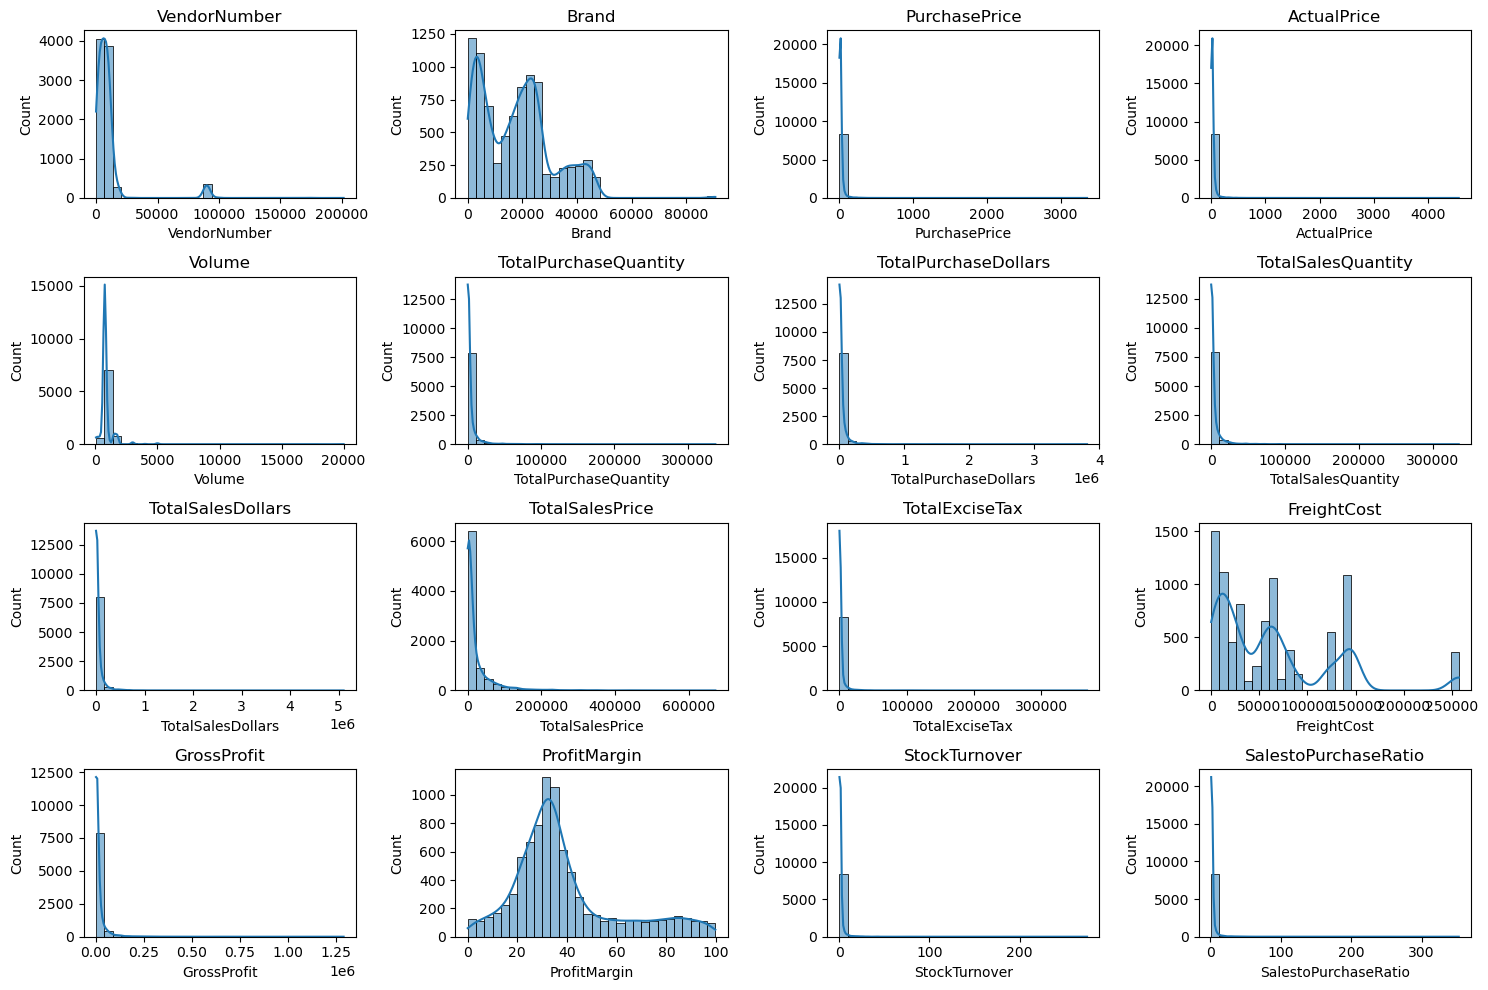

In [9]:
# Get all numeric column names from the cleaned DataFrame.
numerical_cols = df.select_dtypes(include = np.number).columns

# Set the overall size of the plot (width = 15, height = 10)
plt.figure(figsize = (15, 10))

# Loop through each numeric column to plot its distribution.
for i, col in enumerate(numerical_cols):

    # Create a subplot grid (4 rows, 4 columns) and select the (i + 1)th subplot.
    plt.subplot(4, 4, i + 1)

    # Plot a histogram with a KDE (curve) for the current numeric column.
    sns.histplot(df[col], kde = True, bins = 30)

    # Set the title of each subplot to the column name.
    plt.title(col)

# Adjust layout to prevent overlap between plots.
plt.tight_layout()

# Display all the subplots.
plt.show()

## (3.5) COUNT PLOTS FOR TOP 10 CATEGORICAL VALUES

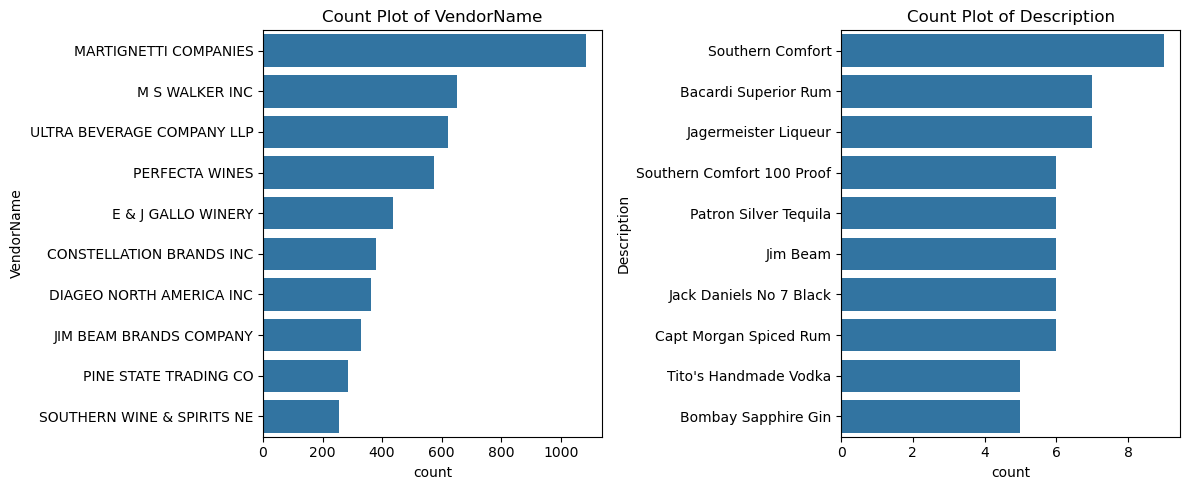

In [10]:
# List of columns with categorical/text values.
categorical_cols = ["VendorName", "Description"]

# Set the figure size of the count plot.
plt.figure(figsize = (12, 5))

# Loop through each categorical column.
for i, col in enumerate(categorical_cols):

    # Create subplots side by side (1 row, 2 columns)
    plt.subplot(1, 2, i + 1)

    # Plot the top 10 most frequent categories in each column.
    sns.countplot(
        y = df[col], 
        # Show only top 10 columns.
        order = df[col].value_counts().index[:10]) 

    # Set title for each subplot.
    plt.title(f"Count Plot of {col}")

# Adjust spacing between subplots.
plt.tight_layout()

# Display the final plot.
plt.show()

## (3.6) CORRELATION HEATMAP OF NUMERIC FEATURES

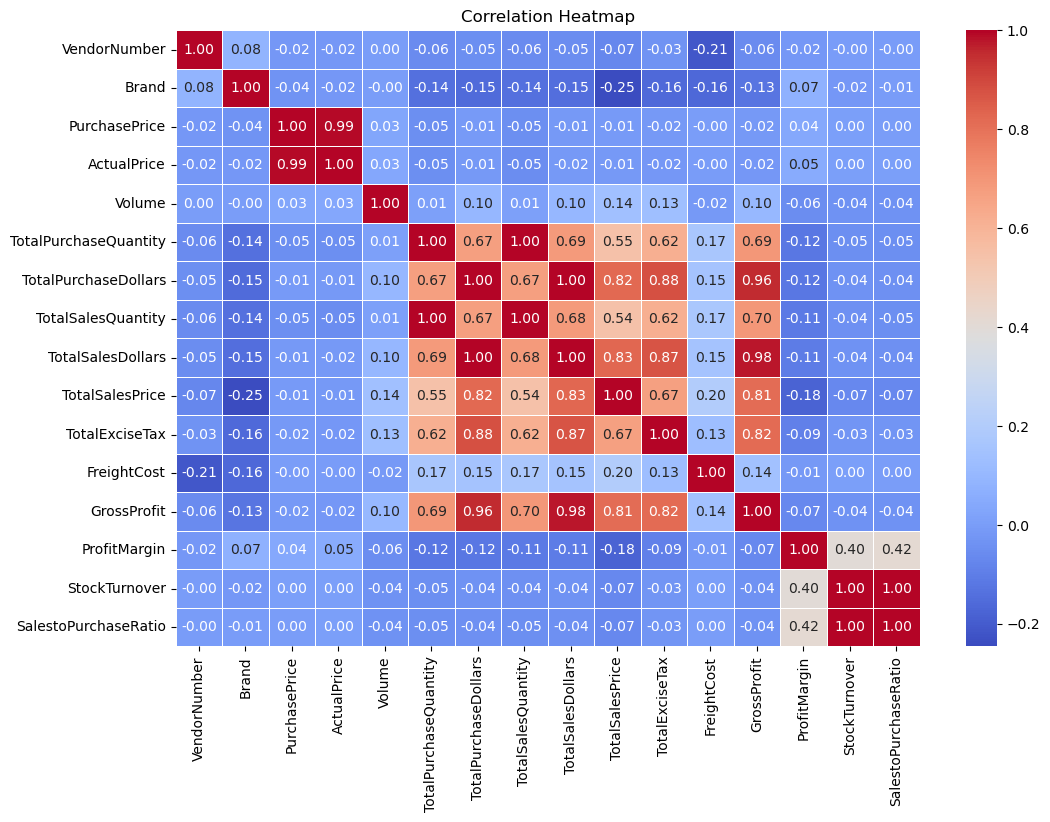

In [11]:
# Set the size of the heatmap figure.
plt.figure(figsize = (12, 8))

# Calculate the correlation matrix for all numeric columns.
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap to show correlations between numeric columns.
sns.heatmap(

    # Data to plot
    correlation_matrix, 

    # Show correlation values in each cell.
    annot = True, 

    # Format the numbers to 2 decimal values.
    fmt = ".2f", 

    # Color scheme from blue (low) to red (high).
    cmap = "coolwarm", 

    # Add lines between the cells.
    linewidths = 0.5
)

# Set the title for the heatmap.
plt.title("Correlation Heatmap")

# Show the heatmap.
plt.show()

**Correlation Insights:**
>- PurchasePrice has weak correlation with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations(changes) do not strongly affect sales revenue or profit.
>- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming that inventory is used and sold quickly.
>- Negative correlation between profit margin and total sales price (-0.179) shows that as sales price increases, profit margin decreases, possibly due to pricing pressure from competitors. 
>- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not always bring better profits.

# 4. DATA ANALYSIS

## (4.1) IDENTIFY BRANDS THAT NEEDS PROMOTIONAL OR PRICING ADJUSTMENT WHICH EXHIBIT LOWER SALES PERFORMANCE BUT HIGHER PROFIT MARGINS. 

### (4.1.1) PRODUCT-WISE SALES AND PROFIT SUMMARY

In [12]:
# Grouping the data by product description to get total sales and 
# average profit margin for each brnad/item.
brand_performance = df.groupby('Description').agg({

    # Total sales for each brand.
    'TotalSalesDollars' : 'sum',

    # Average profit margin for each brand.
    'ProfitMargin' : 'mean'
    
}).reset_index()  # Reset index to turn the group labels into regular columns.

In [13]:
# It stores total sales and average profit margin for each product.

brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


### (4.1.2) IDENTIFY LOW SALES AND HIGH MARGIN THRESHOLDS

In [14]:
# Set the 15th percentile value of total sales as the low sales threshold.
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)

# Set the 85th percentile value of profit margin as the high margin threshold.
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
# It is used to identify products with low sales.

low_sales_threshold

560.299

In [16]:
# It is used to identify products with high profit margin. 

high_margin_threshold

64.97017552750113

### (4.1.3) FILTER BRANDS WITH LOW SALES BUT HIGH PROFIT MARGINS 

In [17]:
# Filer the brands where total sales are less than or equal to the low sales threshol
# and profit margin is greater tham or equal to the high margin threshold.
target_brands = brand_performance [

    # Condition for low sales.
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    
    # Condition for high margin.
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

# Print a message to indicate what is being displayed.
print("Brands with Low Sales but High Margins :")

# Display the filtered brands sorted by total sales in ascending order.
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Margins :


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


### (4.1.4) CREATING SCATTER PLOT : SALES VS PROFIT MARGIN WITH TARGET BRANDS HIGHLIGHTED

In [18]:
# Keep only brands with sales less than $10000. 
# For better visualization.

brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

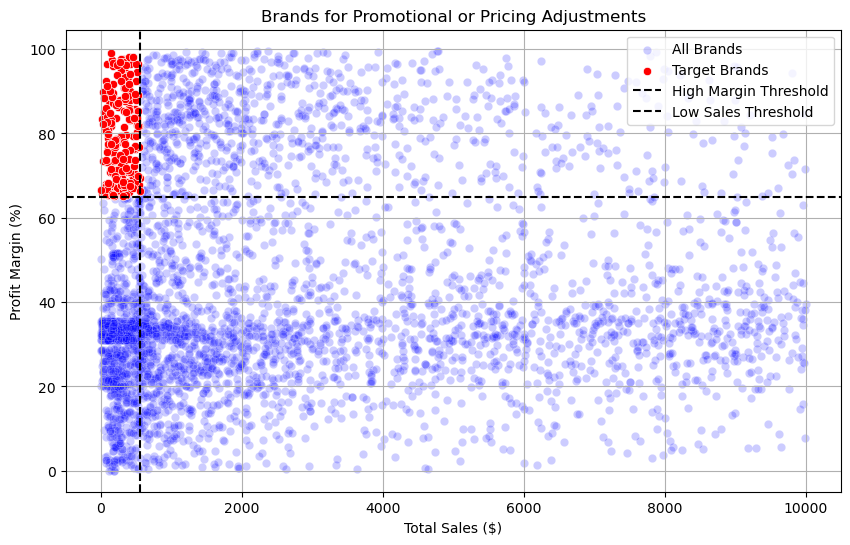

In [19]:
# Set the size of the plot (width = 10, height = 6 inches).
plt.figure(figsize = (10, 6))

# Plot all brands with light blue dots..
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color = "blue", label = "All Brands", alpha = 0.2)

# Highlight target brands in red dots.
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = "red", label = "Target Brands")

# Add a horizontal line to show high profit margin level.
plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = "High Margin Threshold")

# Add a vertical line to show low sales level.
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = "Low Sales Threshold")

# Label for x-axis.
plt.xlabel("Total Sales ($)")

# Label for y-axis.
plt.ylabel("Profit Margin (%)")

# Title of the chart.
plt.title("Brands for Promotional or Pricing Adjustments")

# Show the legend (explains colors and lines).
plt.legend()

# Show grid lines in the background.
plt.grid(True)

# Display the final plot.
plt.show()

## (4.2) WHICH VENDORS AND BRANDS DEMONSTRATE THE HIGHEST SALES PERFORMANCE

### (4.2.1) TOP 10 VENDORS AND BRANDS BY SALES : SIMPLE GROUPING AND SUMMING

In [20]:
# Group data by VendorName, sum the TotalSalesDollars for each vendor, and get top 10. 
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)

# Group data by Description (brand name), sumthe TotalSalesDollars for each brand, and get top 10.
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [21]:
# Display the top 10 vendors.

top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [22]:
# Display the top 10 brands.

top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

### (4.2.2) FORMAT SALES VALUES INTO M (MILLIONS) OR K (THOUSANDS)

In [23]:
# Define a function named 'format_dollars' that takes a number (value) as input.
def format_dollars(value):

    # If the value is 1,000,000 or more
    if value >= 1_000_000:

        # Convert it to millions and return as a string with 2 decimal places followed by 'M'.
        return f"{value / 1_000_000 : .2f}M"

    # If the value is 1,000 or more but less than 1,000,000
    elif value >= 1_000:

        # Convert it to thousands and return as a string with 2 decimal places followed by 'K'.
        return f"{value / 1_000 : .2f}K"

    # If the value is less than 1,000
    else:

        # Return the value as it is, converted to a string.
        return str(value)

In [24]:
# Apply the format_dollars function to each value in the top_vendors.
# 'x' represents each sales value in the top_vendors.

top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.33M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

In [25]:
# Apply the format_dollars function to each value in the top_brands.
# 'x' represents each sales value in the top_brands Series.

top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

### (4.2.3) PLOT TOP 10 VENDORS AND BRANDS BY SALES (SIDE-BY-SIDE BAR CHARTS)

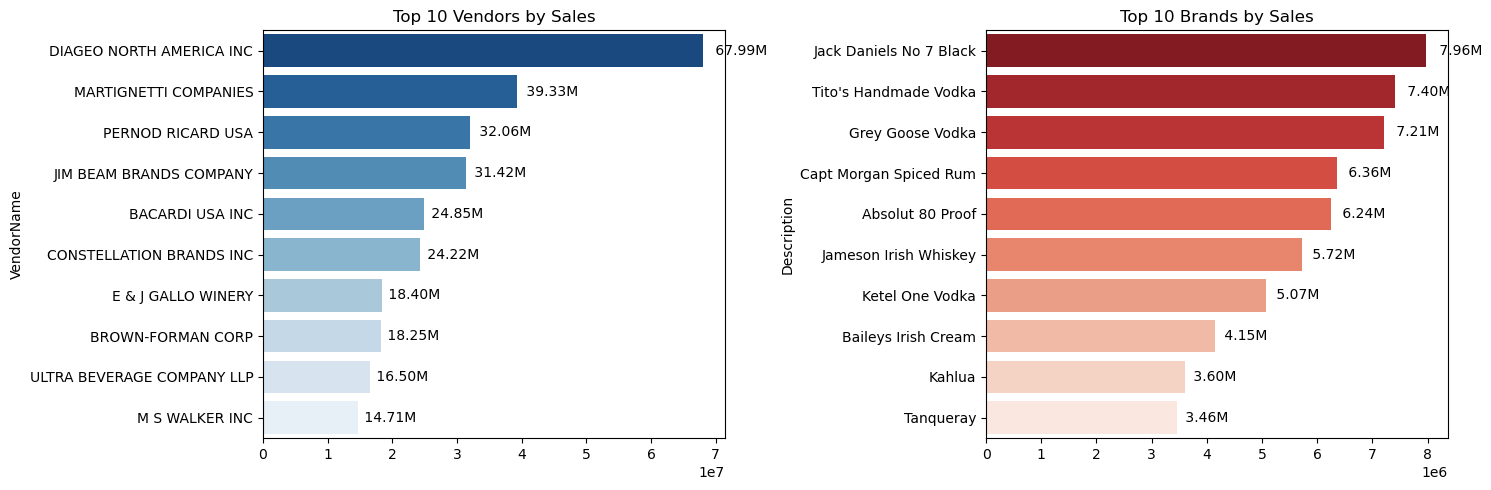

In [26]:
# Set the overall figure size (width = 15, height = 5)
plt.figure(figsize = (15, 5))


# ---------- Plot for Top Vendors ----------

# Create the first subplot (1 row, 2 columns, 1st plot).
plt.subplot(1, 2, 1)

# Create a horizontal bar chart for top vendors.
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = "Blues_r")

# Set title for the vendor chart.
plt.title("Top 10 Vendors by Sales")

# Add value labels to each bar.
for bar in ax1.patches:
    
    ax1.text(
        # x position slightly after the bar.
        bar.get_width() + (bar.get_width() * 0.02),
        
        # y position at the center of the bar. 
        bar.get_y() + bar.get_height() / 2,

        # formatted text (e.g., 2.5M).
        format_dollars(bar.get_width()),

        # align text to the left-middle.
        ha = 'left', va = 'center', 

        # set font size and color.
        fontsize = 10, color = 'black')



# ---------- Plot for Top Brands ----------

# Create the second subplot (1 row, 2 columns, 2nd plot).
plt.subplot(1, 2, 2)

# Create a horizontal bar  chart for top brnads.
ax2 = sns.barplot(y = top_brands.index, x = top_brands.values, palette = "Reds_r")

# Set title for the brand chart.
plt.title("Top 10 Brands by Sales")

# Add value labels to each bar.
for bar in ax2.patches:
    
    ax2.text(
        # x position slightly after the bar.
        bar.get_width() + (bar.get_width() * 0.02),

        # y position at the center of the bar.
        bar.get_y() + bar.get_height() / 2,

        # formatted text (e.g., 800K).
        format_dollars(bar.get_width()),

        # align text to the left-middle.
        ha = 'left', va = 'center', 

        # set font size and color.
        fontsize = 10, color = 'black')

# Adjust layout so plots don't overlap.
plt.tight_layout()

# Show the final combined plot.
plt.show()

## (4.3) WHICH VENDORS CONTRIBUTE THE MOST TO TOTAL PURCHASE DOLLARS ?

### (4.3.1) VENDOR-WISE TOTAL SALES, PURCHASES, AND PROFIT SUMMARY

In [27]:
# Create a new DataFrame 'vendor_performance' with total metrics for each vendor.
vendor_performance = df.groupby('VendorName').agg({

    # Calculate total purchase amount for each vendor.
    'TotalPurchaseDollars' : 'sum',

    # Calculate total gross profit for each vendor.
    'GrossProfit' :'sum',

    # Calculate total sales amount for each vendor.
    'TotalSalesDollars' : 'sum'

# Reset index to turn 'VendorName' from index back into a column.
}).reset_index()

### (4.3.2) CALCULATE AND SORT VENDOR PURCHASE CONTRIBUTION

In [28]:
# Calculate each vendor's contribution to total purchase and add it as a new column.

vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [29]:
# Sort vendors by PurchaseContribution% in descending order and round values to 2 decimal places.

vendor_performance = round(vendor_performance.sort_values('Purchase_Contribution%', ascending = False), 2)

### (4.3.3) FORMAT AND DISPLAY TOP 10 VENDORS BY PERFORMANCE

In [30]:
# Select the top 10 vendors from the vendor_performance DataFrame.
top_vendors = vendor_performance.head(10)

# Format TotalSalesDollars into readable format (e.g., 2.5M, 450K).
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)

# Format TotalPurchaseDollars into readable format.
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)

# Format GrossProfit into readable format.
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

# Display the final top_vendors table.
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [31]:
# Calculate the total of PurchaseContribution% for the top 10 vendors.

top_vendors['Purchase_Contribution%'].sum()

65.69000000000001

### (4.3.4) ADD CUMULATIVE PURCHASE CONTRIBUTION FOR TOP 10 VENDORS

In [32]:
# Calculate running total (cumulative sum) of Purchase_Contribution% for top vendors.
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

# Show the updated top_vendors DataFrame.
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


### (4.3.5) PARETO CHART : VENDOR-WISE PURCHASE CONTRIBUTION

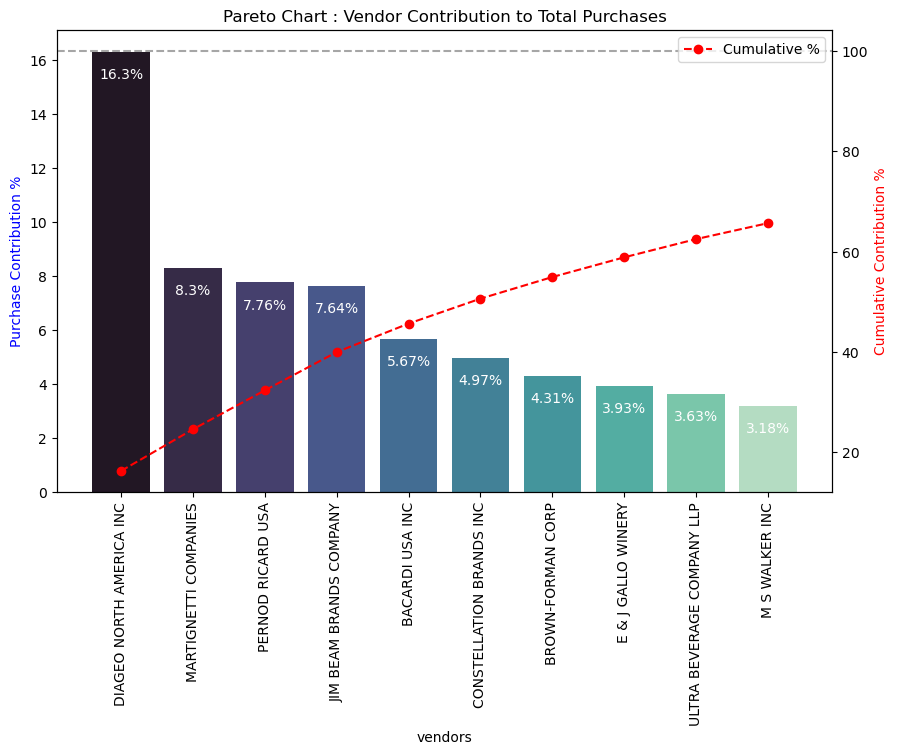

In [33]:
# Create a figure and axis (ax1) for the bar chart with specific size.
fig, ax1 = plt.subplots(figsize = (10, 6))


# ----------- Bar plot for Purchase contribution -----------
# Create a bar plot showing each vendor's purchase contribution percentage. 
sns.barplot(
    # x-axis : vendor names
    x = top_vendors['VendorName'], 
    
    # y-axis : contribution %
    y = top_vendors['Purchase_Contribution%'], 
    
    # color theme
    palette = "mako", 

    # plot on the primary axis.
    ax = ax1)


# Add percentage labels on each bar
for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(
        # x-position (bar index)
        i, 

        # y-position (slightly below the bar top)
        value - 1, 

        # label text
        str(value) + '%', 

        # center aligned, white text
        ha = 'center', fontsize = 10, color = 'white'
    )




# ----------- Line Plot for Cumulative Contribution ----------
# Create a secondary y-axis (ax2) sharing the same x-axis.
ax2 = ax1.twinx()

# Plot a dashed red line showing cumulative contribution %
ax2.plot(
    # x-axis : vendor names
    top_vendors['VendorName'],

    # y-axis : cumulative %
    top_vendors['Cumulative_Contribution%'], 
    
    # red line with markers
    color = 'red', marker = 'o', linestyle = 'dashed', 
    
    # label for legend
    label = 'Cumulative %')


# Set x-axis labels (vendor names) to vertical for better readability.
ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)

# Set y-axis labels and their colors.
ax1.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')

# Set x-axis label.
ax1.set_xlabel('vendors')

# Set title of the chart.
ax1.set_title('Pareto Chart : Vendor Contribution to Total Purchases')

# Add a horizontal dashed line at 100% t show full contribution reference.
ax2.axhline( y = 100, color = 'gray', linestyle = 'dashed', alpha = 0.7)

# Show legend for the line plot (Cumulative %)
ax2.legend(loc = 'upper right')

# Display the final plot.
plt.show()

## (4.4) HOW MUCH OF TOTAL PROCUREMENT IS DEPENDENT ON THE TOP VENDORS?

### (4.4.1) DISPLAY TOTAL PURCHASE CONTRIBUTION OF TOP 10 VENDORS

In [34]:
# Print the total purchase contribution of the top 10 vendors, rounded to 2 decimal places. 

print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(), 2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


### (4.4.2) DONUT CHART - TOP 10 VENDORS VS OTHERS (PURCHASE CONTRIBUTION %)

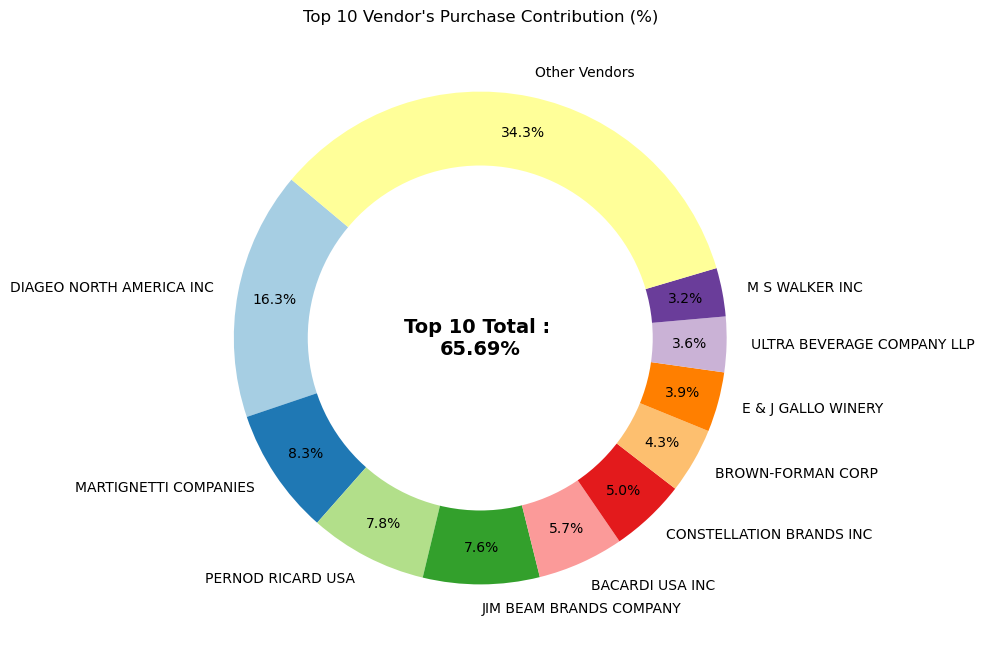

In [35]:
# Get list of vendor names from the top_vendors DataFrame.
vendors = list(top_vendors['VendorName'].values)

# Get the list of purchase contribution percentages for each top vendor. 
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)

# Calculate the total contribution of the top 10 vendors. 
total_contribution = sum(purchase_contributions)

# Calculating the remaining contribution (from all other vendors).
remaining_contribution = 100 - total_contribution



# ----------- Append "Other Vendors" Category ----------

# Add "Other Vendors" to the list of vendor names.
vendors.append("Other Vendors")

# Add the remaining contribution value to the list.
purchase_contributions.append(remaining_contribution)



# ---------- Donut Chart ----------

# Create a new figure and axis for the plot with size 8*8.
fig, ax = plt.subplots(figsize = (8, 8))


# Create a pie chart with labels, percentages, and a specific color palette.
wedges, texts, autotexts = ax.pie(
    # data values (percentages)
    purchase_contributions, 

    # labels for each slice
    labels = vendors, 

    # format for showing % on slices
    autopct = '%1.1f%%',

    # start angle of the pie chart
    startangle = 140, 

    # position of % labels (closer to center)
    pctdistance = 0.85,

    # use a built-in color palette
    colors = plt.cm.Paired.colors)


# Draw a white circle in the center to create a donut effect.
center_circle = plt.Circle((0,0), 0.70, fc = 'white')

# Add the white circle to the chart
fig.gca().add_artist(center_circle)


# Add a text label in the center of the donut chart showing top 10 contribution.
plt.text(
    # x and y position (center)
    0, 0, 

    # text to display
    f"Top 10 Total : \n{total_contribution:.2f}%", 

    # text size
    fontsize = 14, 

    # bold text
    fontweight = 'bold', 

    # center alignment
    ha = 'center', va = 'center'
)

# Set the title of the chart.
plt.title("Top 10 Vendor's Purchase Contribution (%)")

# Display the final donut chart.
plt.show()

## (4.5) DOES PURCHASING IN BULK REDUCE THE UNIT PRICE, AND WHAT IS THE OPTIMAL PURCHASE VOLUME FOR COST SAVINGS ?

### (4.5.1) ANALYZE AVERAGE UNIT PURCHASE PRICE BY ORDER SIZE

In [36]:
# Calculate unit purchase price by dividing total purchase amount by quantity.

df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [37]:
# Categorize orders into Small, Medium, and Large based on purchase quantity using qunatile bins.

df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ["Small", "Medium", "Large"])

In [38]:
# Group the data by OrderSize and calculate the average unit purchase price for each group. 

df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


### (4.5.2) BOXPLOT - UNIT PURCHASE PRICE BY ORDER SIZE

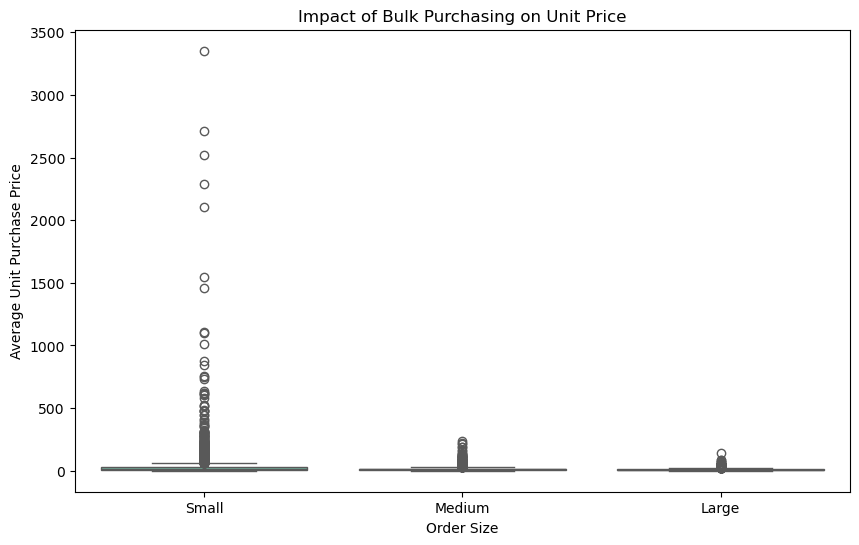

In [39]:
# Set the figure size for the plot.
plt.figure(figsize = (10, 6))

# Create a boxplot to show the distribution of unit purchase price across different order sizes.
sns.boxplot(data = df, x = "OrderSize", y = "UnitPurchasePrice", palette = "Set2")

# Set the title of the plot.
plt.title("Impact of Bulk Purchasing on Unit Price")

# Label the x-axis as Order Size.
plt.xlabel("Order Size")

# Label the y-axis as Average unit Purchase Price.
plt.ylabel("Average Unit Purchase Price")

# Display the final plot.
plt.show()

**Insights :**
>- Vendors who place large orders pay the lowest unit price ($10.78 per unit). This helps them save money on each item. With good inventory management, this can result in higher profit margins.
>- The price difference between Small and Large orders is huge (-72% reduction in unit cost).
>- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, helping boost overall sales even if gthe price per unit is lower.

## (4.6) WHICH VENDORS HAVE LOW INVENTORY TUNROVER, INDICATING EXCESS STOCK AND SLOW-MOVING PRODUCTS?

In [40]:
# Get top 10 vendors with the lowest average stock turnover (where turnover is less than 1)
df[df['StockTurnover'] < 1] \
  .groupby('VendorName')[['StockTurnover']] \
  .mean() \
  .sort_values('StockTurnover', ascending=True) \
  .head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


## (4.7) HOW MUCH CAPITAL IS LOCKED IN UNSOLD INVENTORY PER VENDOR, AND WHICH VENDORS CONTRIBUTE THE MOST TO IT ?

### (4.7.1) CALCULATE TOTAL UNSOLD INVENTORY VALUE

In [41]:
# Calculate the value of unsold inventory for each row.
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

# Print the total value of all unsold inventory using the format_dollars function.
print('Total Unsold Capital :', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital :  2.71M


### (4.7.2) TOP VENDORS BY UNSOLD INVENTORY VALUE (CAPITAL LOCKED)

In [42]:
# Aggregate total unsold value (capital locked) for each vendor.
inventory_value_per_vendor = (df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index())

# Sort vendors in descending order based on unsold inventory value.
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = "UnsoldInventoryValue", ascending = False)

# Format the inventory value to readable dollar format (e.g., 1.2M, 850K). 
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Display the top 10 vendors with the highest capital locked in unsold inventory.
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


## (4.8) WHAT IS THE 95% CONFIDENCE INTERVALS FOR PROFIT MARGINS OF TOP-PERFORMING AND LOW-PERFORMING VENDORS

### (4.8.1) COMPARE PORFIT MARGINS OF TOP VS LOW VENDORS BASED ON SALES

In [43]:
# Find the 75th percentile (Top 25%) sales value.
top_threshold = df["TotalSalesDollars"].quantile(0.75)

# Find the 25th percentile (Bottom 25%) sales value.
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [44]:
# Select profit margins of vendors with high sales (above 75th percentile).
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]["ProfitMargin"].dropna()

# Select profit margins of vendors with low sales (below 25th percentile).
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [45]:
# Display the profit margins of top-selling vendors.

top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [46]:
# Display the profit margins of low-selling vendors.

low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

### (4.8.2) CALCULATE CONFIDENCE INTERVAL FOR A DATA SAMPLE

In [47]:
# Define a function to calculate the confidence interval
# Takes two inputs : data (a list or array of numbers) and confidence interval (default is 95%).
def confidence_interval(data, confidence = 0.95):

    # Calculate the average (mean) of the data.
    mean_val = np.mean(data)

    # Calculate the standard error (standard deviation / √n).
    std_err = np.std(data, ddof = 1) / np.sqrt(len(data))

    # Get the t-critical value from the t-distribution for the given confidence level. 
    t_critical = stats.t.ppf((1 + confidence) / 2, df = len(data) - 1)

    # calculate the margin of error.
    margin_of_error = t_critical * std_err

    # Return the mean and the lower and upper bounds of the confidence interval. 
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

### (4.8.3) VISUALIZING CONFIDENCE INTERVALS OF PROFIT MARGINS (TOP VS LOW VENDRS)

In [48]:
# Calculating confidence interval (mean, lower bound, upper bound) for top vendors.
top_mean, top_lower, top_upper = confidence_interval(top_vendors)

# Calculating confidence interval for low vendors.
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Printing confidence intervals and means.
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}")

Top Vendors 95% CI: (30.74, 31.61, Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64, Mean: 41.57


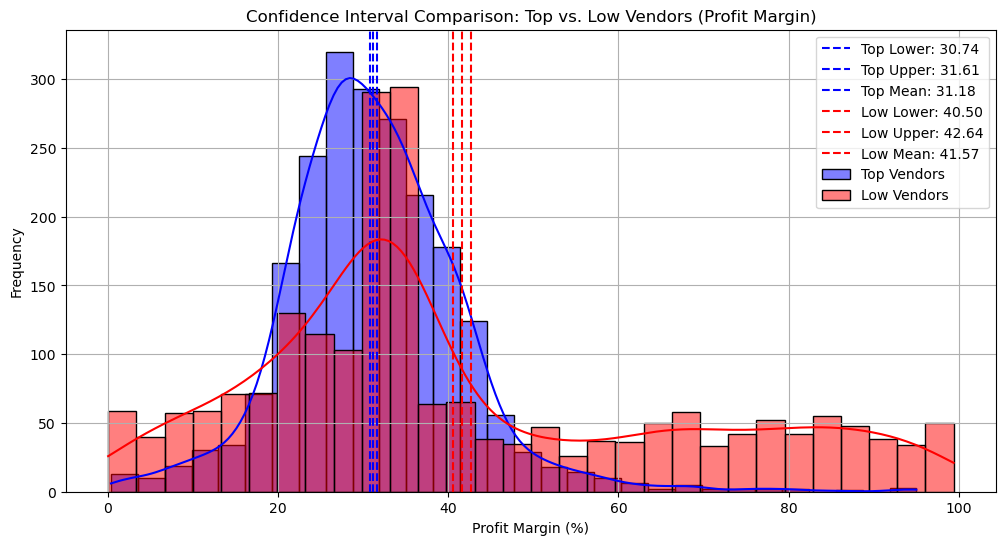

In [49]:
# Setting the figure size for the plot.
plt.figure(figsize = (12, 6))



# ---------- Plot for Top Vendors ----------

# Plotting histogram and KDE for top vendor's profit margin.
sns.histplot(top_vendors, kde = True, color = "blue", bins = 30, alpha = 0.5, label = "Top Vendors")

# Adding vertical line for lower bound of top vendor's CI.
plt.axvline(top_lower, color = "blue", linestyle = "--", label = f"Top Lower: {top_lower:.2f}")

# Adding vertical line for upper bound of top vendor's CI.
plt.axvline(top_upper, color = "blue", linestyle = "--", label = f"Top Upper: {top_upper:.2f}")

# Adding vertical line for mean of top vendors.
plt.axvline(top_mean, color = "blue", linestyle = "--", label = f"Top Mean: {top_mean:.2f}")



# ---------- Plot for Low Vendors ----------

# Plotting histogram and KDE for low vendor's profit margin.
sns.histplot(low_vendors, kde = True, color = "red", bins = 30, alpha = 0.5, label = "Low Vendors")

# Adding vertical line for lower bound of low vendor's CI.
plt.axvline(low_lower, color = "red", linestyle = "--", label = f"Low Lower: {low_lower:.2f}")

# Adding vertical line for upper bound of low vendor's CI.
plt.axvline(low_upper, color = "red", linestyle = "--", label = f"Low Upper: {low_upper:.2f}")

# Adding vertical line for mean of low vendors.
plt.axvline(low_mean, color = "red", linestyle = "--", label = f"Low Mean: {low_mean:.2f}")



# ---------- Finalize Plot Settings ----------

# Setting the title of the plot.
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")

# Labeling the x-axis.
plt.xlabel("Profit Margin (%)")

# Labeling the y-axis.
plt.ylabel("Frequency")

# Showing the legend for all lines and labels.
plt.legend()

# Displaying grid lines on the plot.
plt.grid(True)

# Showing the complete plot.
plt.show()

**Insights :**
>- The confidence interval for low-performing vendors (40.48% to 42.62%) is clearly higher than that of top-performing vendors (30.74% to 31.61%).
>- This suggests that vendors with lower sales often earn more profit, possibly due to charging higher prices or spending less on operations.
>- For High-Performing Vendors : To improve profitability, they can explore adjusting prices for specific products, finding ways to lower operating costs, or offering product bundles to increase overall sales.
>- For Low-Performing Vendors : Even with high profit margins, low sales may suggest they need to market better, offer more competitive prices, or improve how their products reach customers.

## (4.9) IS THERE A SIGNIFICANT DIFFERENCE IN PROFIT MARGINS BETWEEN TOP-PERFORMING AND LOW-PERFORMING VENDORS?

**Hypothesis :**
>- **H<sub>0</sub>(Null Hypothesis) :** There is no clear difference in the mean(average) profit margins of top-performing and low-performing vendors.
>- **H<sub>1</sub>(Alternate Hypothesis) :** The mean(average) profit margins of top-performing and low-performing vendors are clearly different.

### (4.9.1) T-Test to Compare Profit Margins of Vendors.

In [50]:
# Setting threshold for top-performing vendors as the 75th percentile (top 25% sales).
top_threshold = df["TotalSalesDollars"].quantile(0.75)

# Setting threshold for low-performing vendors as the 25th percentile (bottom 25% sales).
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Selecting profit margins of top vendors whose total sales are in the top 25%.
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()

# Selecting profit margins of low vendors whose total sales are in the bottom 25%.
low_vendors = df[df["TotalSalesDollars"] >= low_threshold]["ProfitMargin"].dropna()

# Performing independent two-sample t-test to compare profit margins between top and low vendors.
# Setting equal_var = False because we assume unequal variance.
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

# Print the T-statistics and p-value for the test result. 
print(f"T-Statistic : {t_stat : .4f}, P-Value : {p_value : .4f}")


# If p-value is less than 0.05, the result is clear - reject null hypothesis.
if p_value < 0.05 :
    print("Reject H₀ : There is a clear difference in profit margins between top and low-performing vendors.")

# If p-value is greater than or equal to 0.05, result is not clear - fail to reject null hypothesis.  
else:
    print("Fail to Reject  H₁ : No clear difference in profit margins.")

T-Statistic : -19.8217, P-Value :  0.0000
Reject H₀ : There is a clear difference in profit margins between top and low-performing vendors.
